In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

In [2]:
# [1]시계열 데이터 y=0.5sini(x)-cos(x/2) 정의

x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2*x) - np.cos(x/2.0)

# print(x)
# print(y)
# print('-'*50)

seq_data = y.reshape(-1, 1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


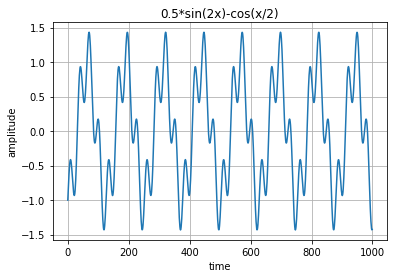

In [3]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [4]:
# [2] 입력 데이터 X, 정답 데이터 Y 생성

def seq2dataset(seq, window, horizon):
    X = []
    Y = []

    for i in range(len(seq)-(window+horizon)+1):
        x = seq[i:(i+window)]
        y = (seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

In [5]:
w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [6]:
# [3] 트레이닝 데이터/테스트 데이터 분리

split_ratio = 0.8
split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [7]:
# [4] SimpleRNN 모델 구축

model = Sequential()

model.add(SimpleRNN(units = 128,
                   activation='tanh',
                   input_shape=x_train[0].shape))

model.add(Dense(1))

In [8]:
model.compile(loss='mse', optimizer ='adam' , metrics = ['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 시간표시

from datetime import datetime

start_time = datetime.now()
hist = model.fit(x_train, y_train, epochs=100, validation_data = (x_test, y_test))
end_time = datetime.now()

print('Elapsed Time => ', end_time - start_time)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.1148 - mae: 0.2169 - val_loss: 0.0056 - val_mae: 0.0601
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0562 - val_loss: 0.0027 - val_mae: 0.0418
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0013 - val_mae: 0.0279
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 9.7864e-04 - mae: 0.0247 - val_loss: 8.2720e-04 - val_mae: 0.0232
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 7.5860e-04 - mae: 0.0218 - val_loss: 7.4019e-04 - val_mae: 0.0206
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 4.8956e-04 - mae: 0.0175 - val_loss: 3.2999e-04 - val_mae: 0.0140
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 3.0143e-04 - mae: 0.0137 - val_loss: 2.8039e-04 - val_mae: 0.0131
Epoch 8/100
25/25 [==============================]

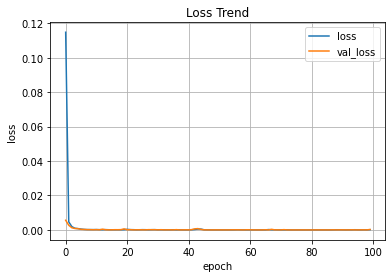

In [10]:
# 그래프

plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.show()

In [11]:
pred = model.predict(x_test)
print(pred.shape)

7/7 [==============================] - 0s 2ms/step
(196, 1)


In [12]:
rand_idx = np.random.randint(0, len(y_test), size = 5)
print('random idx = ', rand_idx, '\n')
print('pred = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [ 28  47  36 116 176] 

pred =  [ 0.773937    0.10193765 -0.1159943   0.93195516  0.15769413]
label =  [ 0.77743169  0.12498835 -0.09860133  0.92047014  0.16917248]


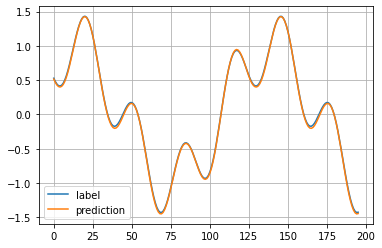

In [13]:
plt.plot(y_test, label='label')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')
plt.show()

In [14]:
# [5] 모델학습(EarlyStop 적용)

# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(montior='val_loss', patience = 5)

# model.fit(x_train, y_train,
#          validation_data = (x_test, y_test),
#          epochs = 100, batch_size = 16,
#          callbacks=[early_stop])